# [documentation of pandas data frame plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)
## [matplotlib cheat sheet](https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png)

# <center>Topic 2. Visual data analysis in Python
## <center>Part 2. Overview of Seaborn, Matplotlib and Plotly libraries

In [16]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

# Increase the default plot size and set the color scheme
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["image.cmap"] = "viridis"
import pandas as pd

Now, let’s load the dataset that we will be using into a `DataFrame`. I have picked a dataset on video game sales and ratings from [Kaggle Datasets](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings).
Some of the games in this dataset lack ratings; so, let’s filter for only those examples that have all of their values present.

In [24]:
df = pd.read_csv('/Users/esmaeilpourjavad/data_science_path/mlcourse.ai/data/video_games_sales.csv').dropna()
print(df.shape)

(6825, 16)


In [30]:
df.info

<bound method DataFrame.info of                                     Name Platform  Year_of_Release     Genre  \
0                             Wii Sports      Wii             2006    Sports   
2                         Mario Kart Wii      Wii             2008    Racing   
3                      Wii Sports Resort      Wii             2009    Sports   
6                  New Super Mario Bros.       DS             2006  Platform   
7                               Wii Play      Wii             2006      Misc   
...                                  ...      ...              ...       ...   
16667         E.T. The Extra-Terrestrial      GBA             2001    Action   
16677     Mortal Kombat: Deadly Alliance      GBA             2002  Fighting   
16696  Metal Gear Solid V: Ground Zeroes       PC             2014    Action   
16700                             Breach       PC             2011   Shooter   
16706            STORM: Frontline Nation       PC             2011  Strategy   

       

In [26]:
df["User_Score"] = df["User_Score"].astype("float64")
df["Year_of_Release"] = df["Year_of_Release"].astype("int64")
df["User_Count"] = df["User_Count"].astype("int64")
df["Critic_Count"] = df["Critic_Count"].astype("int64")

The resulting `DataFrame` contains 6825 examples and 16 columns. Let’s look at the first few entries with the `head()` method to check that everything has been parsed correctly. To make it more convenient, I have listed only the variables that we will use in this notebook.

In [27]:
useful_cols = [
    "Name",
    "Platform",
    "Year_of_Release",
    "Genre",
    "Global_Sales",
    "Critic_Score",
    "Critic_Count",
    "User_Score",
    "User_Count",
    "Rating",
]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


## 2. DataFrame.plot()

Before we turn to Seaborn and Plotly, let’s discuss the simplest and often most convenient way to visualize data from a `DataFrame`: using its own `plot()` method.

As an example, we will create a plot of video game sales by country and year. First, let’s keep only the columns we need. Then, we will calculate the total sales by year and call the `plot()` method on the resulting `DataFrame`.

<AxesSubplot:xlabel='Year_of_Release'>

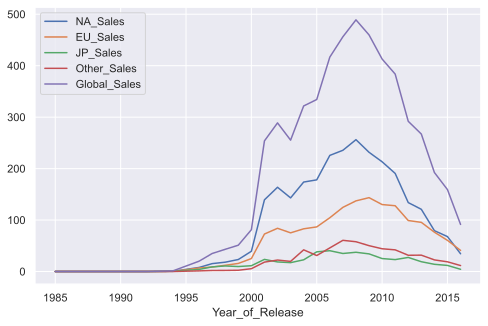

In [29]:
df[[x for x in df.columns if "Sales" in x] + ["Year_of_Release"]].groupby(
    "Year_of_Release"
).sum().plot()

<AxesSubplot:xlabel='Year_of_Release'>

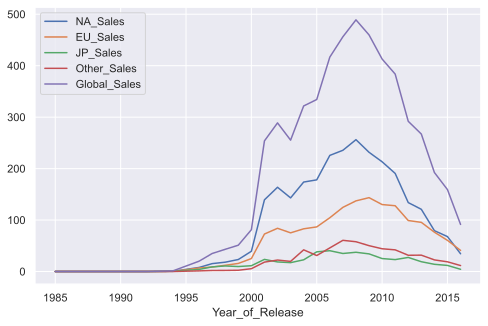

In [31]:
# Select sales columns and year column
sales_columns = [col for col in df.columns if "Sales" in col]
columns_to_use = sales_columns + ["Year_of_Release"]
df_sales = df[columns_to_use]

# Group by year and sum sales
df_sales_by_year = df_sales.groupby("Year_of_Release").sum()

# Plot the result
df_sales_by_year.plot()

Using the `kind` parameter, you can change the type of the plot to, for example, a *bar chart*. `matplotlib` is generally quite flexible for customizing plots. You can change almost everything in the chart, but you may need to dig into the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) to find the corresponding parameters. For example, the parameter `rot` is responsible for the rotation angle of ticks on the x-axis (for vertical plots):

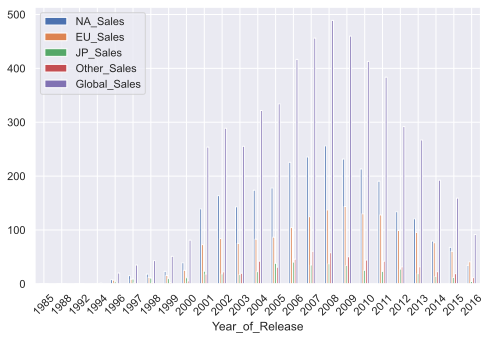

In [32]:
df[[x for x in df.columns if "Sales" in x] + ["Year_of_Release"]].groupby(
    "Year_of_Release"
).sum().plot(kind="bar", rot=45);

## 3. Seaborn

Now, let's move on to the `Seaborn` library. `seaborn` is essentially a higher-level API based on the `matplotlib` library. Among other things, it differs from the latter in that it contains more adequate default settings for plotting. By adding `import seaborn as sns; sns.set()` in your code, the images of your plots will become much nicer. Also, this library contains a set of complex tools for visualization that would otherwise (i.e. when using bare `matplotlib`) require quite a large amount of code.

#### pairplot()

Let's take a look at the first of such complex plots, a *pairwise relationships plot*, which creates a matrix of scatter plots by default. This kind of plot helps us visualize the relationship between different variables in a single output.

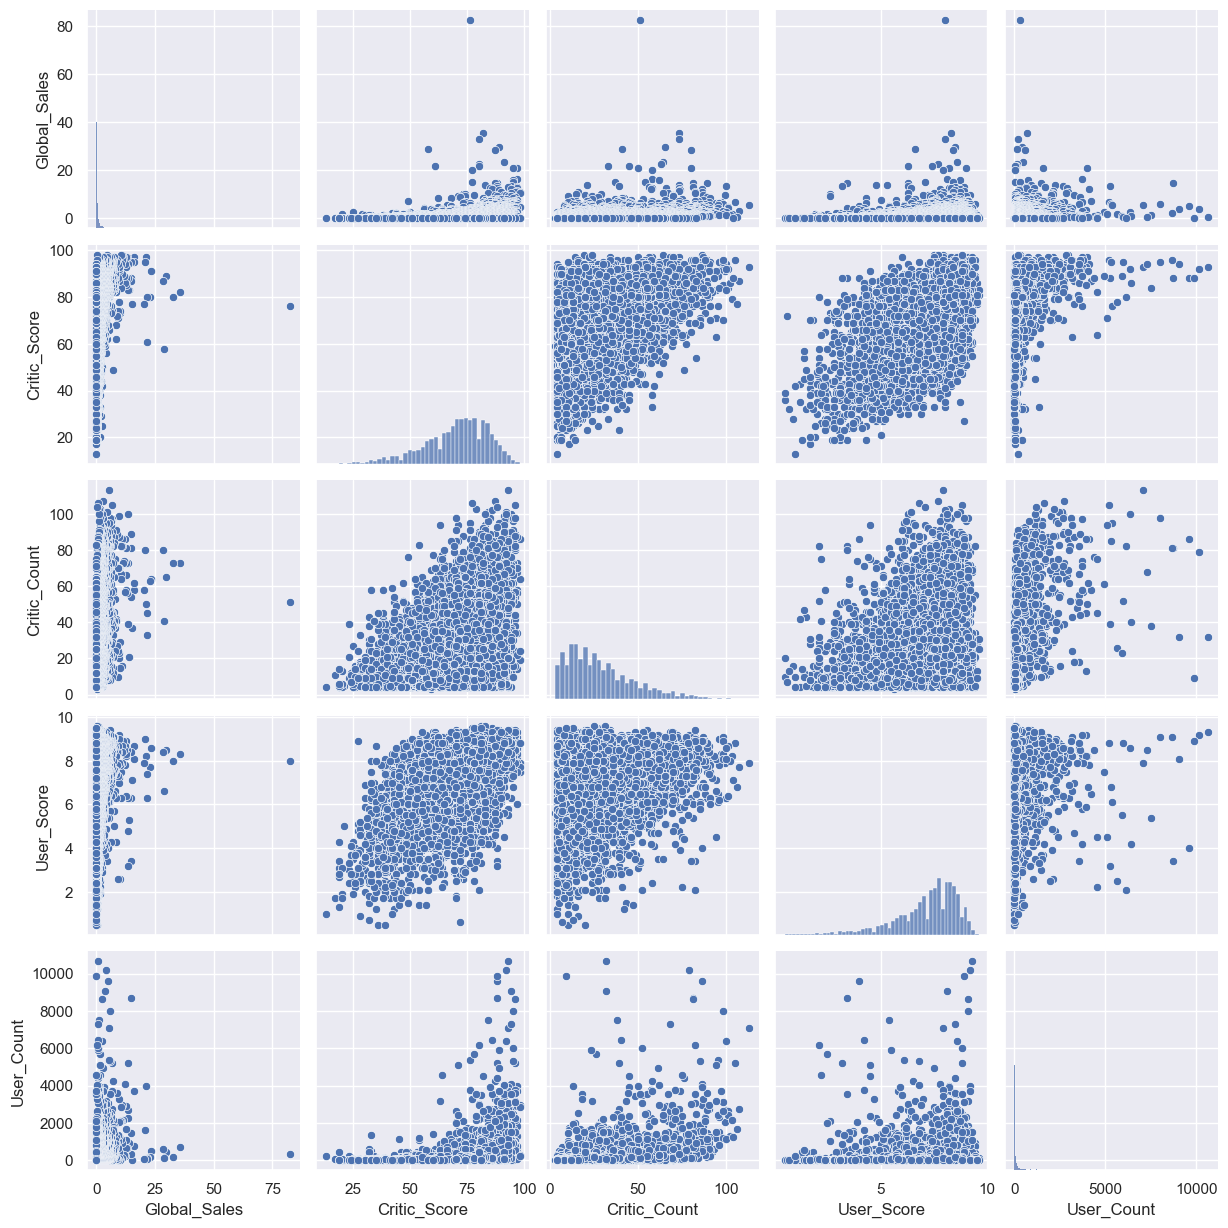

In [33]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(
    df[["Global_Sales", "Critic_Score", "Critic_Count", "User_Score", "User_Count"]]
);